## Considerations for running time for $\mu-e$ separation measurements

Consider an analysis of a $\mu$ enriched sample (using beamline measurements) from a data run lasting $h$ hours. As a simplifying assumption, only muon and electron events are considered.
A table of parameters used in the formulae appear at the bottom of this cell.

### Beamline selection

Prior to making the measurement, the numbers of muon and electron events in the sample are described by random variables (RV, denoted by capital letters) whose expectations are:

$$
E[N_\mu] = h \times 60 \times s_{pm} \times \mu_{ps} \times \mu_t \times \mu_f
$$
$$
E[N_e] = h \times 60 \times s_{pm} \times e_{ps} \times e_t \times e_f
$$

In absence of systematic uncertainty, the numbers in a data sample are outcomes of Poisson RVs, $N_\mu$ and $N_e$, having those expectations (and variance).

Consider the one standard deviation systematic uncertainties in these expectation values arising from their offline selection efficiencies:

$$
\sigma(E[N_\mu]) = E[N_\mu] \, \delta_{\mu f}
$$
$$
\sigma(E[N_e]) = E[N_e] \, \delta_{ef}
$$

where $\delta$ refers to the one standard deviation relative uncertainty of the selection efficiency. Combining the statistical and systematic variances yields:

$$
V[N_\mu] =  E[N_\mu] + (\sigma(E[N_\mu]))^2 = E[N_\mu] (1 +  E[N_\mu] \,\delta_{\mu f}^2)
$$
$$
V[N_e] =  E[N_e] + (\sigma(E[N_e]))^2 = E[N_e] (1 +  E[N_e] \, \delta_{ef}^2)
$$

We can treat the RVs, $N_\mu$ and $N_e$, as Gaussians with these variances. The total number of events in the beamline selection sample is

$$
N_b = N_\mu + N_e = N_\mu ( 1 + N_e/N_\mu) = N_\mu ( 1 + R_{e \mu})
$$

The beamline selection will be almost exclusively muons, so the number of muon events in the sample will be known well and does not need to be treated as an RV, since its
variance is negligible.

$$
n_\mu = n_b / (1 + E[N_e]/E[N_\mu])
$$

where lower case variables are outcomes of the corresponding RVs.

### WCTE selection

The events are analyzed further by applying a particle identification algorithm with the WCTE mPMT data.
The WCTE electron selection includes misidentified muons and intrinsic electrons.
Prior to performing the WCTE selection, the number of events in the WCTE electron sample would be described the random variable, $N_{We}$:

$$
N_{We} = N_{We\mu} + N_{Wee}
$$

In absense of systematic uncertainty, the first RV is binomial with $n_\mu$ trials and probability of mis-identification $\mu_{We}$.
Since the mis-identification probability is likely to be much less than 1%, it is well approximated by a Poisson distribution with expectation $n_\mu \, \mu_{We}$.
The second RV is Poisson with expectation $E[N_e]\,e_{We}$.

Including systematic uncertainty, the combined variance is:

$$
V[N_{We}] = n_\mu \, \mu_{We} + E[N_e]\,e_{We} + (\delta(E[N_e])\,e_{We})^2 = n_\mu \, \mu_{We} + E[N_e]\,e_{We} (1 + E[N_e] \, \delta_{ef}^2 \,e_{We}^2)
$$


The unbiased estimator for the $\mu$ mis-identification probability (correcting for the intrinsic electrons in the sample) is the RV:

$$
M_{We} = (N_{We} - E[N_e] \, e_{We})/n_\mu
$$

Whose expectation and variance are:

$$
E[M_{We}] = (E[N_{We}] - E[N_{Wee}])/n_\mu =  E[N_{We\mu}]/n_\mu =  \mu_{We}
$$
$$
V[M_{We}] = V[N_{We}]  / n_\mu^2
$$

Finally, the relative uncertainty of the $\mu$ mis-identification probability is:

$$
\delta\mu_{We} = \sqrt{V[M_{We}]} / \mu_{We}
$$

### Adjustable parameters

 * h ($h$): number of hours
 * spm ($s_{pm}$): number of spills per minute
 * mps ($\mu_{ps}$): number of muons per spill
 * eps ($e_{ps}$): number of electrons per spill
 * mt ($\mu_t$): fraction of muons accepted by trigger (including deadtime effect)
 * et ($e_t$): fraction of electrons accepted by trigger (including electron veto and deadtime)
 * mf ($\mu_f$): efficiency for offline selection to accept a triggered muon
 * dmf ($\delta_{\mu f}$): relative one standard deviation uncertainty of the muon selection efficiency  (not important)
 * ef ($e_f$): efficiency for offline selection to accept a triggered electron
 * def ($\delta_{ef}$): relative one standard deviation uncertainty of the electron selection efficiency  (important)
 * mwe ($\mu_{We}$): probability for WCTE to mis-identify a $\mu$ as an electron
 * ewe ($e_{We}$): probability for WCTE to correctly identify an electron

### Outputs

 * nm ($E[N_\mu]$): expected number of muons in the beamline selection (also used to define $n_\mu$)
 * ne ($E[N_e]$): expected number of electrons in the beamline selection
 * vnm ($V[N_\mu]$): variance in RV representing number of muons in the beamline selection
 * vne ($V[N_e]$): variance in RV representing number of electrons in the beamline selection
 * we ($E[N_{We}]$): expected number of events identified as electrons by WCTE
 * wem ($E[N_{We\mu}]$): expected number of muon events identified as electrons by WCTE
 * wee ($E[N_{Wee}]$): expected number of electron events identified as electrons by WCTE
 * vwe ($V[N_{We}]$): variance in RV representing number of events identified as electrons by WCTE
 * vmwe ($V[M_{We}]$): variance of unbiased estimator for the WCTE $\mu$ mis-identification probability
 * dmwe ($\delta\mu_{We}$): one standard deviation relative uncertainty for the WCTE $\mu$ mis-identification probability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
# Adjustable parameters: Make a copy and adjust.

default_parameters = {
    'h' : 20,
    'spm' : 2,
    'mps' : 500,
    'eps' : 70000,
    'mt' : 0.5,
    'et'  : 0.5/20.,
    'mf' : 0.7,
    'dmf': 0.1,
    'ef'  : 1.E-5,
    'def' : 0.5,
    'mwe' : 0.001,
    'ewe' : 0.9
}

In [3]:
# take the parameter values and do the calculations described above. Return a dictionary with the results.

def calculate(p):
    nm = p['h'] * 60 * p['spm'] * p['mps'] * p['mt'] * p['mf']
    ne = p['h'] * 60 * p['spm'] * p['eps'] * p['et'] * p['ef']

    vnm = nm * (1. + nm * p['dmf']**2)
    vne = ne * (1. + ne * p['def']**2)

    # Assume that the expected number of muons was produced
    n_mu = nm
    wem = nm * p['mwe']
    wee = ne * p['ewe']
    we =  wem + wee
    vwe = nm * p['mwe'] + ne * p['ewe'] * (1. + ne * p['def']**2 * p['ewe']**2)

    vmwe = vwe / n_mu**2
    dmwe = np.sqrt(vmwe)/p['mwe']

    output = {'nm':nm, 'ne':ne, 'vnm':vnm, 'vne':vne, 'we':we, 'wem':wem, 'wee':wee, 'vwe':vwe, 'vmwe':vmwe, 'dmwe':dmwe}
    return output

# print the results of the calculation (either normal or verbose)
def print_results(o, style='normal'):
    if style == 'normal':
        print(f"The beamline muon enriched sample would be expected to contain {o['nm']:0.1f} muon and {o['ne']:0.1f} electron events.")
        print(f"The WCTE electron selection sample would be expected to have {o['wem']:0.1f} muon + {o['wee']:0.1f} electron events = {o['we']:0.1f} events.")
        print(f"The one standard relative uncertainty for the WCTE muon mis-identification probability is {o['dmwe']*100.:0.1f}%")
    elif style == 'verbose':
        print(f"nm (expected number of muons in the beamline selection) = {o['nm']:0.4f}")
        print(f"ne (expected number of electrons in the beamline selection) = {o['ne']:0.4f}")
        print(f"vnm (variance in RV representing number of muons in the beamline selection) = {o['vnm']:0.4f}")
        print(f"vne (variance in RV representing number of electrons in the beamline selection) = {o['vne']:0.4f}")
        print(f"we (expected number of events identified as electrons by WCTE) = {o['we']:0.4f}")
        print(f"wem (expected number of muon events identified as electrons by WCTE) = {o['wem']:0.4f}")
        print(f"wee (expected number of electron events identified as electrons by WCTE) = {o['wee']:0.4f}")
        print(f"vwe (variance in RV representing number of events identified as electrons by WCTE) = {o['vwe']:0.4f}")
        print(f"vmwe (variance of unbiased estimator for the WCTE $\mu$ mis-identification probability) = {o['vmwe']:0.4f}")
        print(f"dmwe (one standard deviation relative uncertainty for the WCTE $\mu$ mis-identification probability) = {o['dmwe']:0.4f}")

def print_parameters(p):
    print(f"h (number of hours) = {p['h']:0.4f}")
    print(f"spm (number of spills per minute) = {p['spm']:0.4f}")
    print(f"mps (number of muons per spill) = {p['mps']:0.4f}")
    print(f"eps (number of electrons per spill) = {p['eps']:0.4f}")
    print(f"mt (fraction of muons accepted by trigger (including deadtime effect)) = {p['mt']:0.4f}")
    print(f"et (fraction of electrons accepted by trigger (including electron veto and deadtime)) = {p['et']:0.4f}")
    print(f"mf (efficiency for offline selection to accept a triggered muon) = {p['mf']:0.4f}")
    print(f"dmf (relative one standard deviation uncertainty of the muon selection efficiency  (not important)) = {p['dmf']:0.4f}")
    print(f"ef (efficiency for offline selection to accept a triggered electron) = {p['ef']:0.4f}")
    print(f"def (relative one standard deviation uncertainty of the electron selection efficiency  (important)) = {p['def']:0.4f}")
    print(f"mwe (probability for WCTE to mis-identify a $\mu$ as an electron) = {p['mwe']:0.4f}")
    print(f"ewe (probability for WCTE to correctly identify an electron) = {p['ewe']:0.4f}")


In [4]:
my_pars = copy.copy(default_parameters)

# print parameters
print_parameters(my_pars)

# do calculation
output = calculate(my_pars)

print()
print('Results:')
print_results(output,style='normal')

print()
print('Results (verbose)')
print_results(output,style='verbose')

h (number of hours) = 20.0000
spm (number of spills per minute) = 2.0000
mps (number of muons per spill) = 500.0000
eps (number of electrons per spill) = 70000.0000
mt (fraction of muons accepted by trigger (including deadtime effect)) = 0.5000
et (fraction of electrons accepted by trigger (including electron veto and deadtime)) = 0.0250
mf (efficiency for offline selection to accept a triggered muon) = 0.7000
dmf (relative one standard deviation uncertainty of the muon selection efficiency  (not important)) = 0.1000
ef (efficiency for offline selection to accept a triggered electron) = 0.0000
def (relative one standard deviation uncertainty of the electron selection efficiency  (important)) = 0.5000
mwe (probability for WCTE to mis-identify a $\mu$ as an electron) = 0.0010
ewe (probability for WCTE to correctly identify an electron) = 0.9000

Results:
The beamline muon enriched sample would be expected to contain 420000.0 muon and 42.0 electron events.
The WCTE electron selection samp

In [5]:
my_pars = copy.copy(default_parameters)
my_pars['h'] = 20
print_results(calculate(my_pars))

The beamline muon enriched sample would be expected to contain 420000.0 muon and 42.0 electron events.
The WCTE electron selection sample would be expected to have 420.0 muon + 37.8 electron events = 457.8 events.
The one standard relative uncertainty for the WCTE muon mis-identification probability is 6.6%


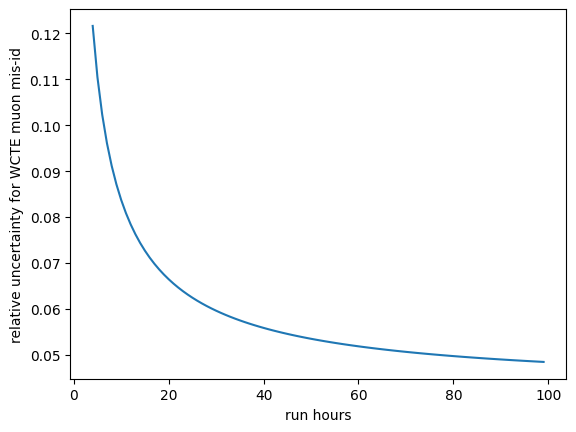

In [6]:
my_pars = copy.copy(default_parameters)
hours = np.arange(4.,100.,1.)
dmwes = []
for h in hours:
    my_pars['h'] = h
    dmwes.append(calculate(my_pars)['dmwe'])

plt.plot(hours,dmwes)
plt.xlabel('run hours')
plt.ylabel('relative uncertainty for WCTE muon mis-id')
plt.show()